In [82]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from math import trunc

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_clinical_data = pd.merge(clinical_data, mouse_data, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [83]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = combined_clinical_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
mean_tumor_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [84]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_vol = combined_clinical_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
std_error_tumor_vol = pd.DataFrame(std_error_tumor_vol)

# Preview DataFrame
std_error_tumor_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [85]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_response = pd.pivot_table(combined_clinical_data, index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)', aggfunc = np.mean)

# Preview that Reformatting worked
Tumor_response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


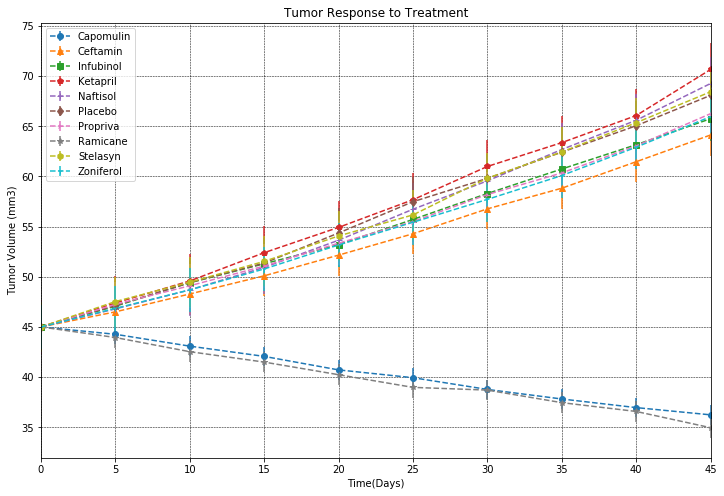

In [86]:
# Generate the Plot (with Error Bars)
Timepoint = Tumor_response.index
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, Tumor_response['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Tumor_response['Ceftamin'],yerr=Tumor_response['Ceftamin'].sem(), marker ='^', linestyle='--', label="Ceftamin")
plt.errorbar(Timepoint, Tumor_response['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Tumor_response['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, Tumor_response['Naftisol'],yerr=Tumor_response['Naftisol'].sem(), marker ='+', linestyle='--', label="Naftisol")
plt.errorbar(Timepoint, Tumor_response['Placebo'],yerr=Tumor_response['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")
plt.errorbar(Timepoint, Tumor_response['Propriva'],yerr=Tumor_response['Propriva'].sem(), marker ='4', linestyle='--', label="Propriva")
plt.errorbar(Timepoint, Tumor_response['Ramicane'],yerr=Tumor_response['Ramicane'].sem(), marker ='*', linestyle='--', label="Ramicane")
plt.errorbar(Timepoint, Tumor_response['Stelasyn'],yerr=Tumor_response['Stelasyn'].sem(), marker ='h', linestyle='--', label="Stelasyn")
plt.errorbar(Timepoint, Tumor_response['Zoniferol'],yerr=Tumor_response['Zoniferol'].sem(), marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
plt.savefig("analysis/plot1.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [87]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Timepoint_response =  combined_clinical_data.groupby(['Drug','Timepoint']).mean()[['Metastatic Sites']]
# Convert to DataFrame
Timepoint_response = pd.DataFrame(Timepoint_response)
# Preview DataFrame
Timepoint_response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [88]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_sites = pd.pivot_table(Timepoint_response, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)

# Convert to DataFrame
Metastatic_sites = pd.DataFrame(Metastatic_sites)

# Preview DataFrame
Metastatic_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


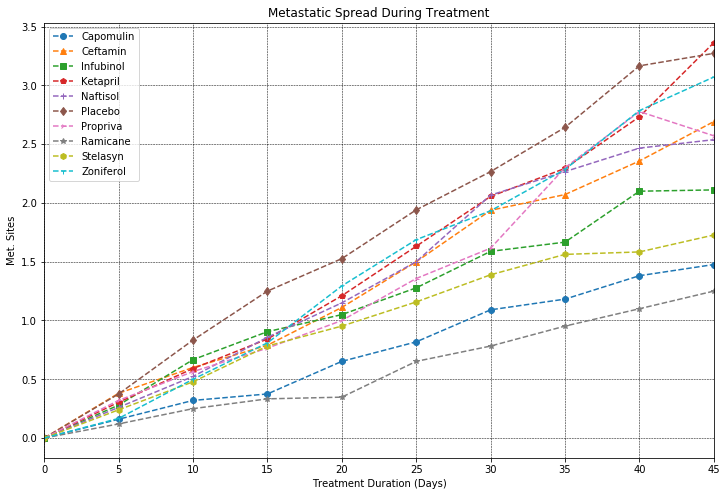

In [89]:
# Generate the Plot (with Error Bars)
Metastatic = Metastatic_sites.index
plt.figure(figsize=(12,8))

plt.plot(Metastatic, Metastatic_sites['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Metastatic, Metastatic_sites['Ceftamin'], marker ='^', linestyle='--', label="Ceftamin")
plt.plot(Metastatic, Metastatic_sites['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Metastatic, Metastatic_sites['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Metastatic, Metastatic_sites['Naftisol'], marker ='+', linestyle='--', label="Naftisol")
plt.plot(Metastatic, Metastatic_sites['Placebo'], marker ='d', linestyle='--', label="Placebo")
plt.plot(Metastatic, Metastatic_sites['Propriva'], marker ='4', linestyle='--', label="Propriva")
plt.plot(Metastatic, Metastatic_sites['Ramicane'], marker ='*', linestyle='--', label="Ramicane")
plt.plot(Metastatic, Metastatic_sites['Stelasyn'], marker ='h', linestyle='--', label="Stelasyn")
plt.plot(Metastatic, Metastatic_sites['Zoniferol'], marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment',xlim = (0,max(Metastatic)))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
plt.savefig("analysis/plot2.png")

# Show the Figure
plt.show()

## Survival Rates

In [90]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_response =  combined_clinical_data.groupby(['Drug','Timepoint']).count()[['Mouse ID']]

# Convert to DataFrame
mouse_response = pd.DataFrame(mouse_response)

# Preview DataFrame
mouse_response.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [91]:
# Minor Data Munging to Re-Format the Data Frames
Survival_pivot = pd.pivot_table(mouse_response, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)

# Preview the Data Frame
Survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


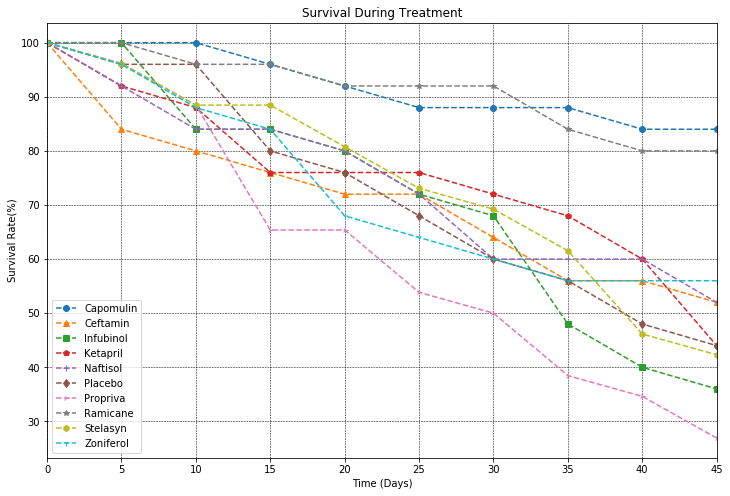

In [92]:
# Generate the Plot (Accounting for percentages)
Survival_rate =  Survival_percentage.index
plt.figure(figsize=(12,8))
plt.plot(Survival_rate, Survival_percentage['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Survival_rate, Survival_percentage['Ceftamin'], marker ='^', linestyle='--', label="Ceftamin")
plt.plot(Survival_rate, Survival_percentage['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Survival_rate, Survival_percentage['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Survival_rate, Survival_percentage['Naftisol'], marker ='+', linestyle='--', label="Naftisol")
plt.plot(Survival_rate, Survival_percentage['Placebo'], marker ='d', linestyle='--', label="Placebo")
plt.plot(Survival_rate, Survival_percentage['Propriva'], marker ='4', linestyle='--', label="Propriva")
plt.plot(Survival_rate, Survival_percentage['Ramicane'], marker ='*', linestyle='--', label="Ramicane")
plt.plot(Survival_rate, Survival_percentage['Stelasyn'], marker ='h', linestyle='--', label="Stelasyn")
plt.plot(Survival_rate, Survival_percentage['Zoniferol'], marker ='1', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (0,max(Survival_rate)))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
plt.savefig("analysis/plot3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [93]:
# Calculate the percent changes for each drug
TumorChangePercent = (((Tumor_response.iloc[-1]-Tumor_response.iloc[0])/Tumor_response.iloc[0])*100).to_frame("% Change")

# Display the data to confirm
TumorChangePercent

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


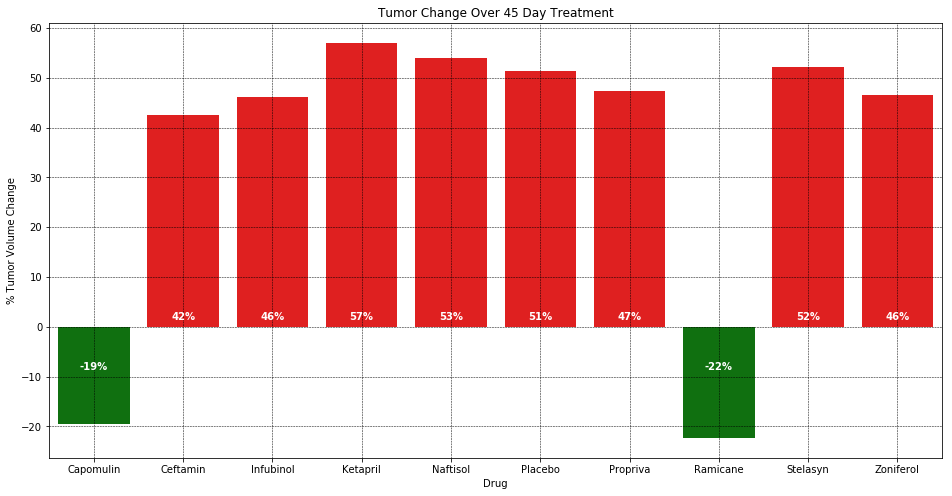

<Figure size 432x288 with 0 Axes>

In [104]:
x = TumorChangePercent.index
y = TumorChangePercent['% Change']
plt.figure(figsize=(16,8))
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()

# Save the Figure
plt.savefig("plot4.png")

# Show the Figure
plt.show()